In [37]:
import networkx as nx

In [70]:
node_number = int(input("Number of nodes?"))

ModuleNotFoundError: No module named 'scipy'

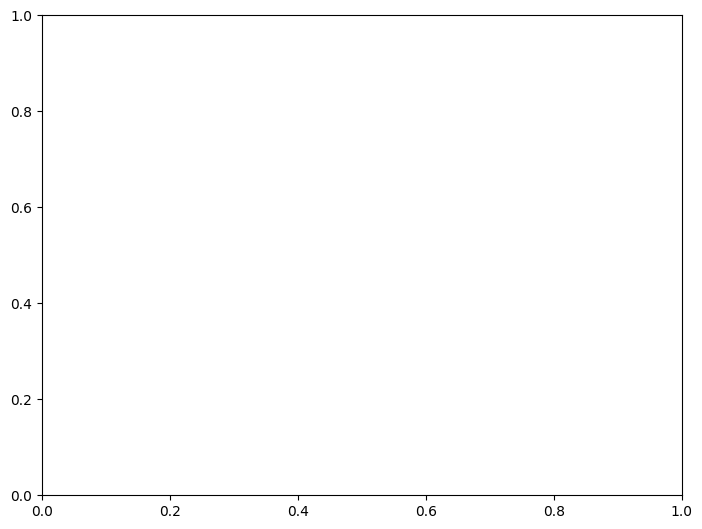

In [79]:
G = nx.Graph()
G.add_nodes_from(range(node_number))
nx.draw(G)

In [69]:
from fractions import Fraction
import math

### Divide by 2 because alpha refers to degree, and I use it as edge creation, which adds degree to 2 nodes
alpha = Fraction(input("Alpha parameter for link creation? (better as a fraction)")) / 2
r = Fraction(input("r parameter for node removal? (better as a fraction)"))

### The step is the gcd of both fractions
step = Fraction(
    math.gcd(alpha.numerator, r.numerator), math.lcm(alpha.denominator, r.denominator)
)

alpha_freq = int(
    (alpha.numerator * step.denominator) / (alpha.denominator * step.numerator)
)
r_freq = int((r.numerator * step.denominator) / (r.denominator * step.numerator))


In [80]:
simulation_steps = int(input("Number of simulation_steps"))
simulation_steps *= min(alpha_freq, r_freq)

In [81]:
import random

avg_degree_evolution = []

for step in range(1, simulation_steps):
    ### quick note, which should happen first? Link addition or node removal?
    if step % alpha_freq == 0:
        G.add_edge(*random.choice(list(nx.non_edges(G))))
    if step % r_freq:
        node_id = random.randint(0, node_number - 1)
        G.remove_node(node_id)
        G.add_node(node_id)
    avg_degree_evolution.append(2*G.number_of_edges() / float(G.number_of_nodes()))


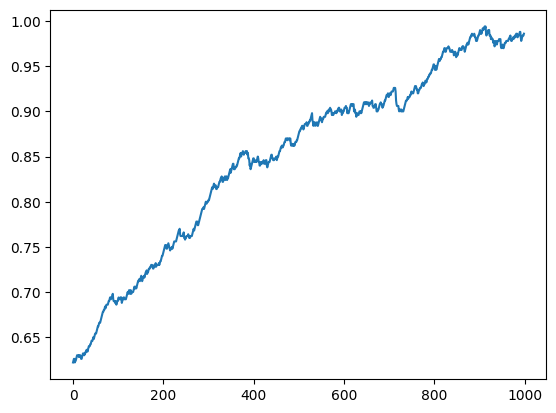

In [78]:
from matplotlib import pyplot as plt


plt.plot(avg_degree_evolution)